In [2]:
from nnpdf import data, defaults, theory
from inference import pdfs
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# datasets I want to consider, random ordering
datasets_list = [
    {'dataset':'HERACOMB_SIGMARED_C'}
]


# load data and covmat for all the dataset
y = data.values(fit=defaults.BASELINE_PDF, dataset_inputs=datasets_list)
cov = data.covmat(fit=defaults.BASELINE_PDF, dataset_inputs=datasets_list)

In [4]:
fks = theory.theory(dataset_inputs=[ds['dataset'] for ds in datasets_list])

In [5]:
fks[0].elements[0].flavors

array([ 1,  2,  3,  6, 11])

In [7]:
#keep original grid (test for one dataset)
fk_grid=fks[0].elements[0].xgrid

In [8]:
# flavour basis pdfs evaluated on the FK xgrid
xg=pdfs.xf(21, "NNPDF40_nnlo_as_01180", 0, fk_grid, 1.65)
xu=pdfs.xf(2, "NNPDF40_nnlo_as_01180", 0, fk_grid, 1.65)
xd=pdfs.xf(1, "NNPDF40_nnlo_as_01180", 0, fk_grid, 1.65)
xs=pdfs.xf(3, "NNPDF40_nnlo_as_01180", 0, fk_grid, 1.65)
xc=pdfs.xf(4, "NNPDF40_nnlo_as_01180", 0, fk_grid, 1.65)
xubar=pdfs.xf(-2, "NNPDF40_nnlo_as_01180", 0, fk_grid, 1.65)
xdbar=pdfs.xf(-1, "NNPDF40_nnlo_as_01180", 0, fk_grid, 1.65)
xsbar=pdfs.xf(-3, "NNPDF40_nnlo_as_01180", 0, fk_grid, 1.65)
xcbar=pdfs.xf(-4, "NNPDF40_nnlo_as_01180", 0, fk_grid, 1.65)

pdf_flavs = np.asarray([xg,xu,xd,xs,xc,xubar,xdbar,xsbar,xcbar])

In [9]:
pdf_flavs.shape

(9, 50)

In [10]:
pdf_evol=pdfs.rot_to_evolution@pdf_flavs

In [11]:
xg=pdf_evol[0,:]
xSigma=pdf_evol[1,:]
xV=pdf_evol[2,:]
xV3=pdf_evol[3,:]
xV8=pdf_evol[4,:] 
xV15=pdf_evol[5,:]
xT3=pdf_evol[6,:]
xT8=pdf_evol[7,:]
xT15=pdf_evol[8,:]

In [12]:
def plot_pdfs_cv(
    cvs,
    labels,
    grid
):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))  # 1 row, 2 columns
    for cv, label in zip(cvs, labels):

        ax1.plot(grid, cv, "-", label=label)
        ax2.plot(grid, cv, "-", label=label)

    ax1.set_xscale("linear")
    ax2.set_xscale("log")
    #ax1.set_ylim(ylinear)
    #ax2.set_ylim(ylog)

    ax1.legend()
    ax2.legend()
    plt.tight_layout()
    plt.show()

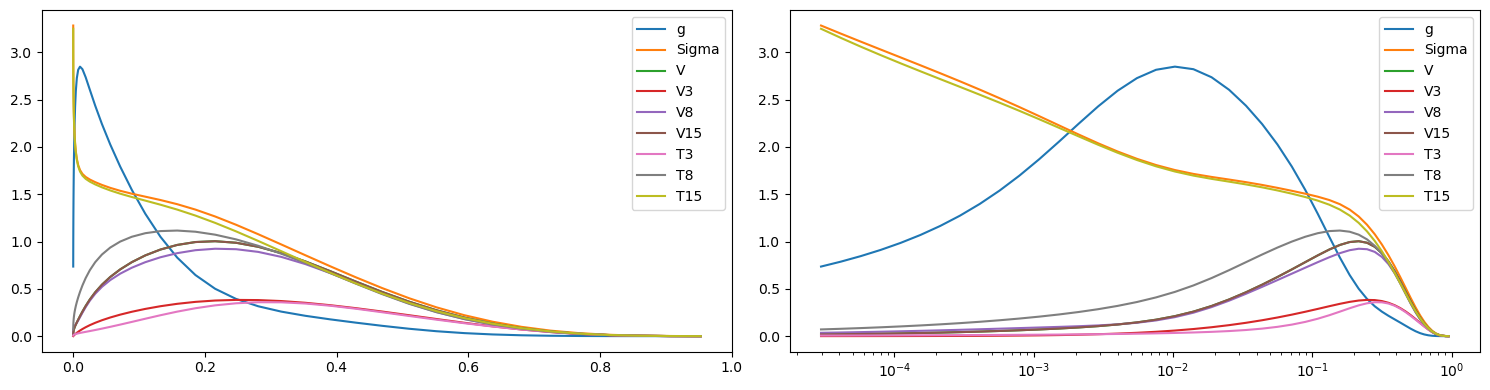

In [13]:
plot_pdfs_cv([xg,xSigma,xV,xV3,xV8,xV15,xT3,xT8,xT15],["g","Sigma","V","V3","V8","V15","T3","T8","T15"],fk_grid)

In [14]:
f=np.concatenate([xSigma,xg,xV,xV3,xV8,xV15,xT3,xT8,xT15])

In [16]:
# flavors I have for this dataset (Sigma,g,V,V15,T15)
fks[0].elements[0].flavors

array([ 1,  2,  3,  6, 11])

In [18]:
# now build the FK tables fr each flavor
FK_S=fks[0].elements[0].table[:,0,:]
FK_g=fks[0].elements[0].table[:,1,:]
FK_V=fks[0].elements[0].table[:,2,:]
FK_V15=fks[0].elements[0].table[:,3,:]
FK_T15=fks[0].elements[0].table[:,4,:]

In [19]:
# build th predictions for data
yth=FK_g@xg + FK_S@xSigma + FK_V@xV + FK_V15@xV15 + FK_T15@xT15

In [20]:
yth

array([0.29426672, 0.27059779, 0.23581621, 0.19930053, 0.15445731,
       0.11159296, 0.31432596, 0.2860292 , 0.24497035, 0.20112993,
       0.1548212 , 0.11604135, 0.33929886, 0.31364574, 0.25856308,
       0.20819156, 0.18321078, 0.14035488, 0.11406947, 0.32421404,
       0.28525632, 0.23417821, 0.18934702, 0.14707685, 0.09863204,
       0.33530414, 0.28410372, 0.22095414, 0.15781993, 0.08164241,
       0.25751616, 0.14926188, 0.19379987, 0.10037744, 0.17570145,
       0.08745426, 0.06122698])

In [21]:
y

array([0.31613 , 0.29041 , 0.24098 , 0.18134 , 0.14761 , 0.10103 ,
       0.31977 , 0.29049 , 0.25539 , 0.20163 , 0.163   , 0.11367 ,
       0.38846 , 0.37557 , 0.2807  , 0.21897 , 0.20149 , 0.15534 ,
       0.094026, 0.32542 , 0.32893 , 0.25762 , 0.1925  , 0.1596  ,
       0.094583, 0.37661 , 0.22743 , 0.21729 , 0.15186 , 0.070217,
       0.23889 , 0.17035 , 0.223   , 0.10646 , 0.2026  , 0.088456,
       0.060261])

In [22]:
l, u = np.linalg.eigh(cov)  # usa np.linalg.eigh
cov_inv = u @ np.diag(1.0 / l) @ u.T

In [23]:
((y-yth)@cov_inv@(y-yth).T)/y.size

2.0444195147145883

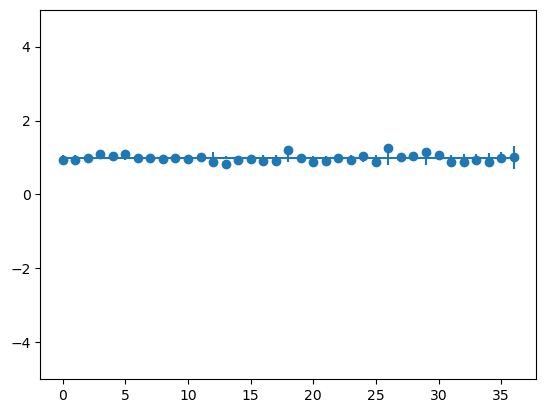

In [25]:
points=np.arange(y.size)
sigma=np.sqrt(np.diagonal(cov))/y
plt.errorbar(points,y/y,sigma)
plt.scatter(points,yth/y)
plt.ylim([-5,5])
plt.show()



In [ ]:
# You can do this with vp2 as well, Check vp2 script in this folder